In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter


plt.rcParams['font.family'] = 'AppleGothic'  # 맥북에서 사용 가능한 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 기호 깨짐 방지

In [10]:
df_youtube_info = pd.read_csv('raw_data/youtube_info/오디오없는것삭제(최종전)/real_final_all_youtubeAPI_info.csv', encoding='utf-8')

df_40= pd.read_csv('raw_data/thumbnails/raw_thumbnails_colors/thumbnails_colors_CSS40c_pooling50m.csv', encoding='utf-8')
df_40_mod = pd.read_csv('raw_data/thumbnails/raw_thumbnails_colors/thumbnails_colors_CSS40cModify_pooling50m.csv', encoding='utf-8')

df_50= pd.read_csv('raw_data/thumbnails/raw_thumbnails_colors/thumbnails_colors_CSS50c_pooling50m.csv', encoding='utf-8')
df_60= pd.read_csv('raw_data/thumbnails/raw_thumbnails_colors/thumbnails_colors_CSS60c_pooling50m.csv', encoding='utf-8')
df_70= pd.read_csv('raw_data/thumbnails/raw_thumbnails_colors/thumbnails_colors_CSS70c_pooling50m.csv', encoding='utf-8')

In [12]:

df_40     = pd.merge(df_youtube_info['video_id'], df_40,     how='inner', on='video_id')
df_40_mod = pd.merge(df_youtube_info['video_id'], df_40_mod, how='inner', on='video_id')
df_50     = pd.merge(df_youtube_info['video_id'], df_50,     how='inner', on='video_id')
df_60     = pd.merge(df_youtube_info['video_id'], df_60,     how='inner', on='video_id')
df_70     = pd.merge(df_youtube_info['video_id'], df_70,     how='inner', on='video_id')


### CSS3 색상 그룹 40개 클러스터링 + 수동 변환

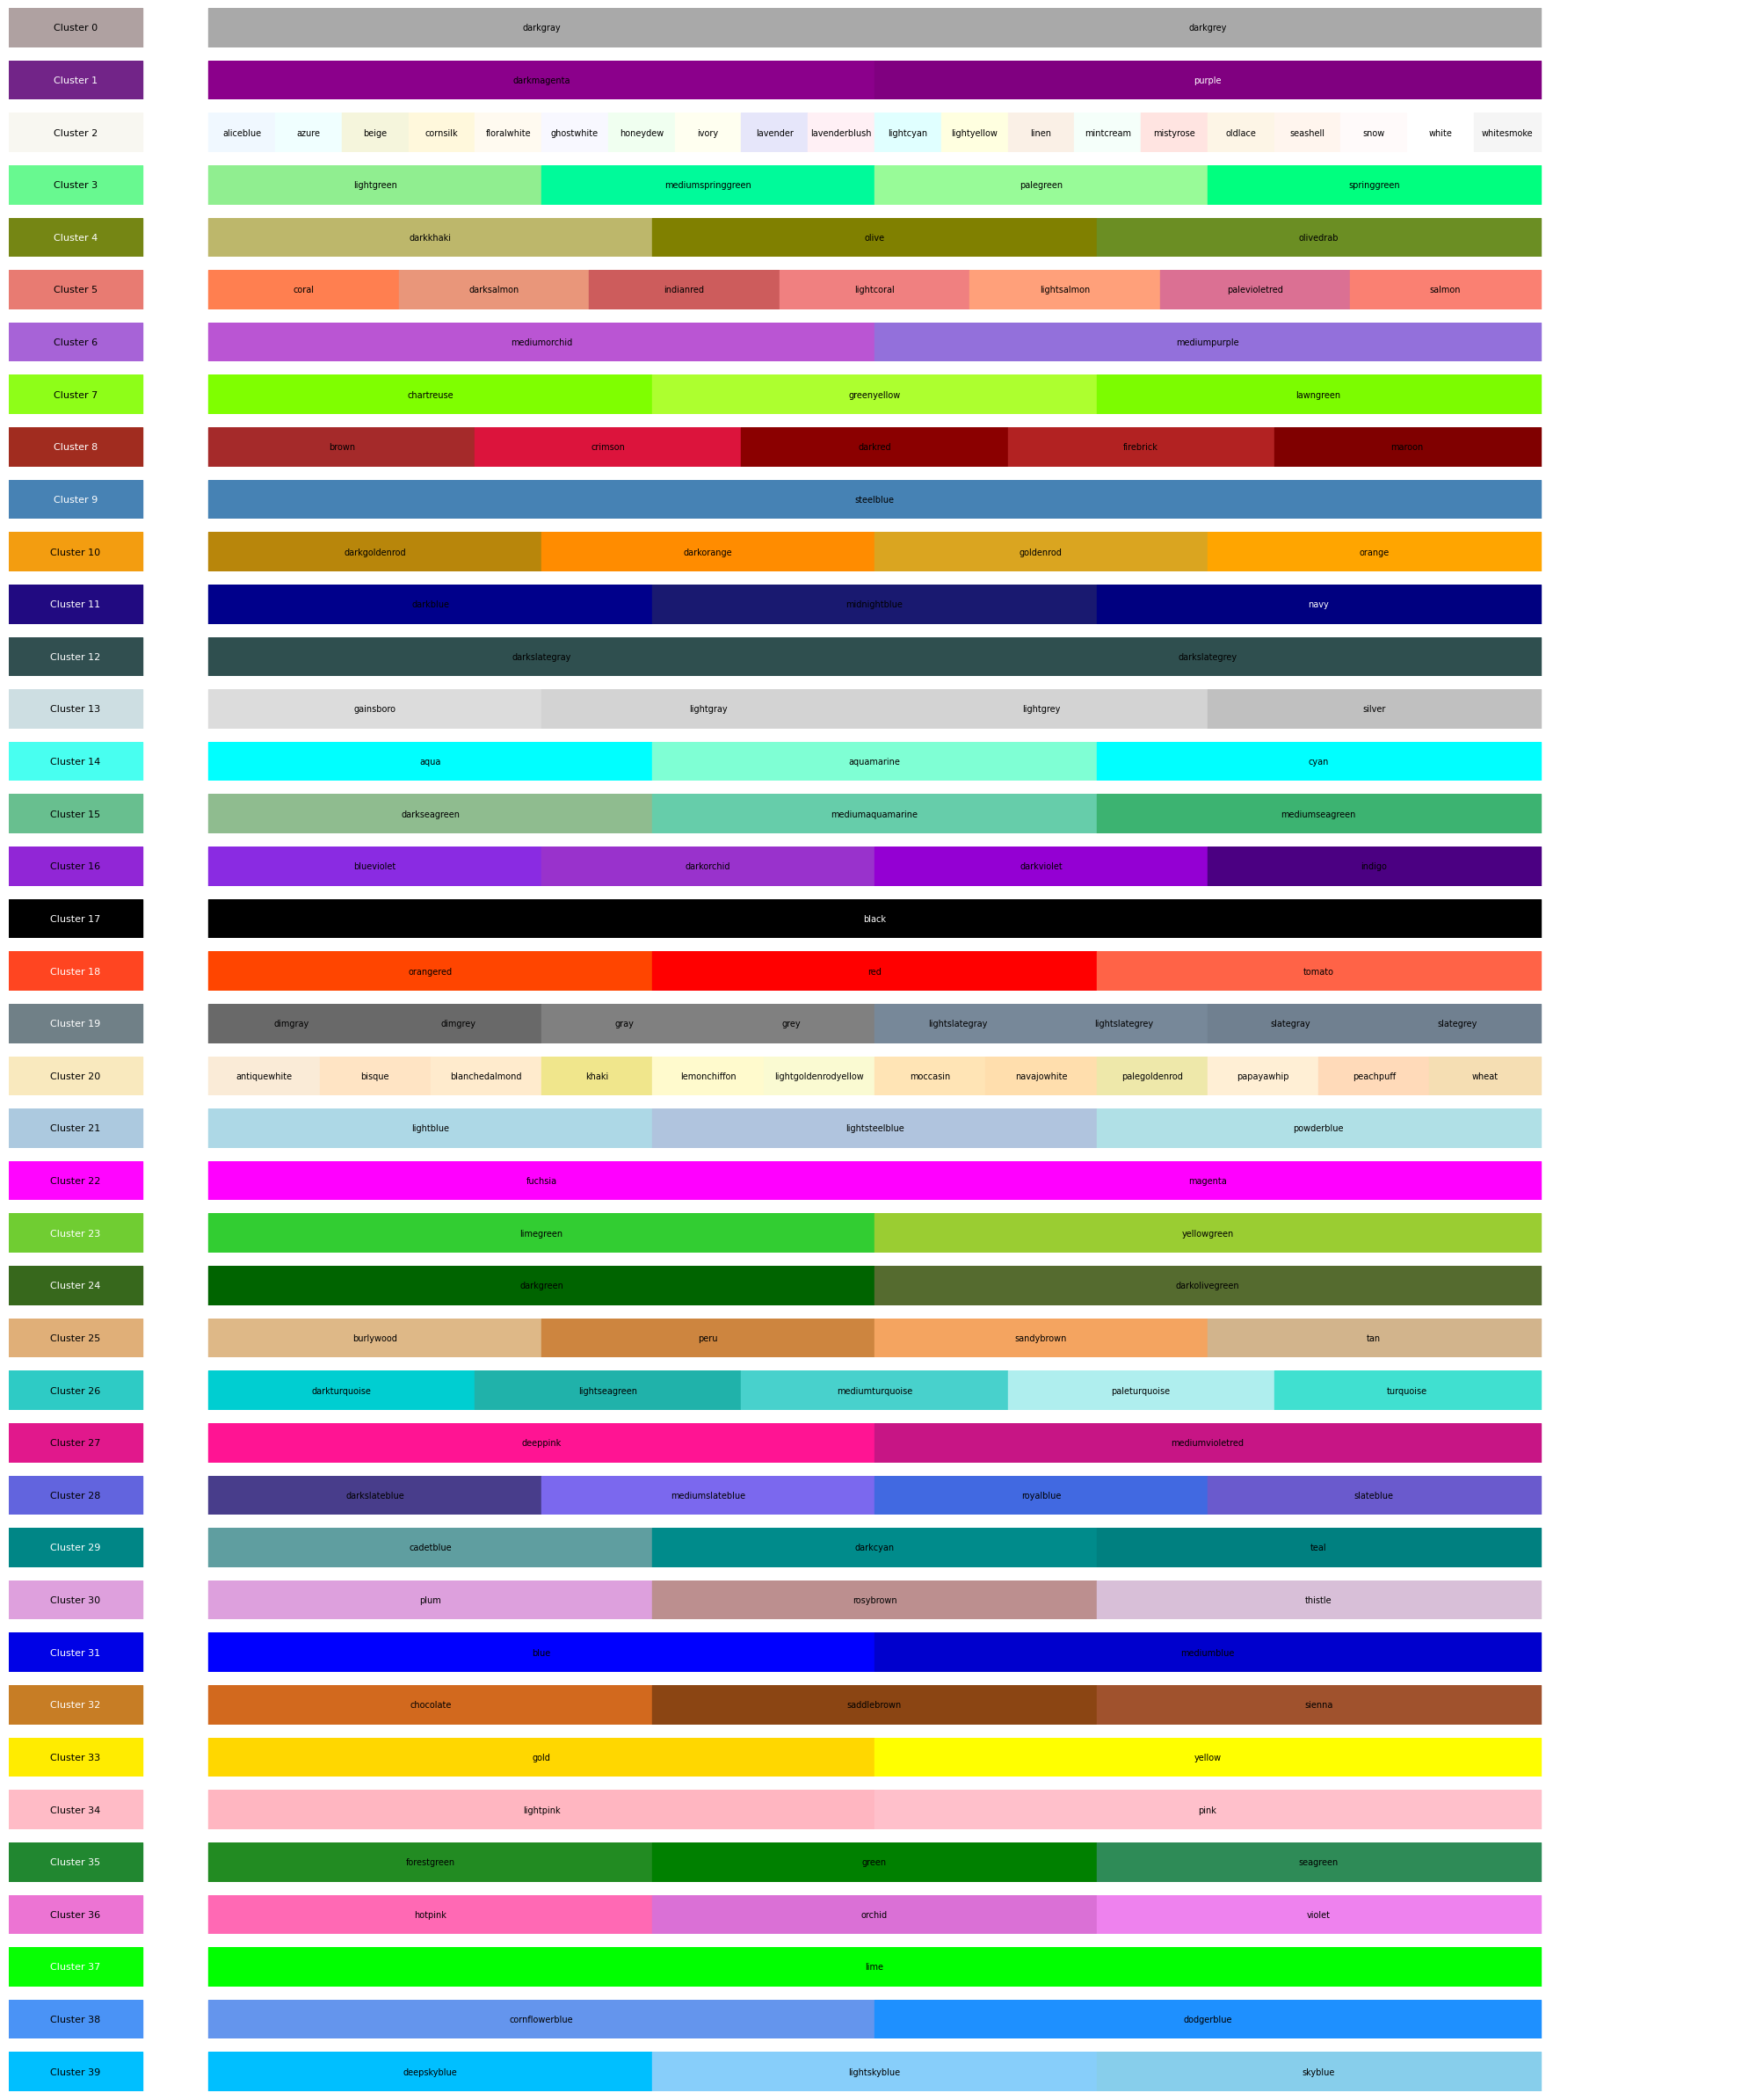

In [16]:
df_40_mod

,video_id,css3_total_colors,color1,color1_ratio,color2,color2_ratio,color3,color3_ratio
0,s6suc9Xz0rM,11,CSS3_Group_17,31.56,CSS3_Group_0,22.36,CSS3_Group_19,9.96
1,kERWAGtltBU,12,CSS3_Group_13,17.68,CSS3_Group_0,17.00,CSS3_Group_12,13.52
2,8VcAaEfuc0s,11,CSS3_Group_12,30.28,CSS3_Group_17,21.00,CSS3_Group_0,20.56
3,CI331OcJ8Do,15,CSS3_Group_32,38.44,CSS3_Group_8,15.56,CSS3_Group_0,9.72
4,AOrtPpF1t7U,9,CSS3_Group_12,33.36,CSS3_Group_17,19.56,CSS3_Group_13,18.68
...,...,...,...,...,...,...,...,...
6314,fLNAk4NYOJU,16,CSS3_Group_13,35.24,CSS3_Group_21,24.36,CSS3_Group_0,18.12
6315,Sh41rnVFlhU,14,CSS3_Group_12,50.20,CSS3_Group_17,19.84,CSS3_Group_19,14.24
6316,z1UGEkHIoCY,15,CSS3_Group_12,70.80,CSS3_Group_19,12.56,CSS3_Group_17,10.44
6317,xVaTzgcJttI,15,CSS3_Group_12,23.44,CSS3_Group_13,22.68,CSS3_Group_0,13.76


In [18]:
df_40_mod['css3_total_colors'].value_counts()

# 색상의 개수를 10개의 초중반 사용하는 이미지가 많음
# 최대 38개를 이용함

css3_total_colors
12    568
13    549
15    535
11    506
14    503
7     461
10    421
9     351
16    347
17    312
8     268
18    230
19    189
6     183
20    137
21    111
22     86
5      85
23     67
25     55
24     54
4      44
28     40
29     33
27     26
30     25
26     25
3      20
32     16
31     16
36     11
37     11
34     10
35      7
38      7
33      6
2       2
40      1
39      1
Name: count, dtype: int64

#### 컬러 2개만 사용한 썸네일
* 2개 이미지 존재 -> color3에 관한 것 null -> 값을 채우기 애매함
* 1개만 사용한 것은 없다.

In [21]:
df_40_mod.loc[df_40['css3_total_colors']==2, :]

,video_id,css3_total_colors,color1,color1_ratio,color2,color2_ratio,color3,color3_ratio
1235,-pIVhc0lc34,2,CSS3_Group_17,70.28,CSS3_Group_12,29.72,NaN,NaN
2075,Onbd9xIrDfk,2,CSS3_Group_12,65.20,CSS3_Group_17,34.80,NaN,NaN


In [23]:
len(df_40_mod.loc[df_40_mod['color3_ratio'].isnull(),:])

2

#### 각 이미지에서 주요한 색상 1위, 2위, 3위끼리 ratio 분포, 평균 확인

<Axes: >

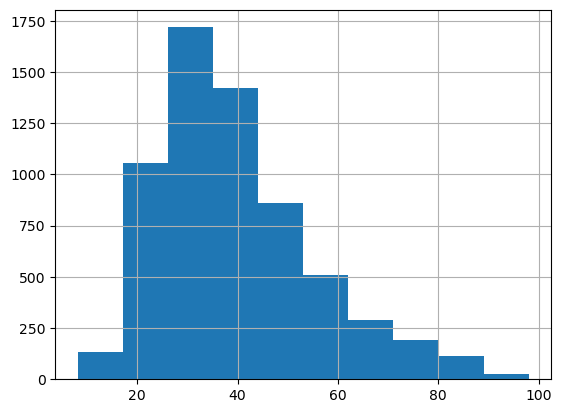

In [26]:
df_40_mod['color1_ratio'].hist()

<Axes: >

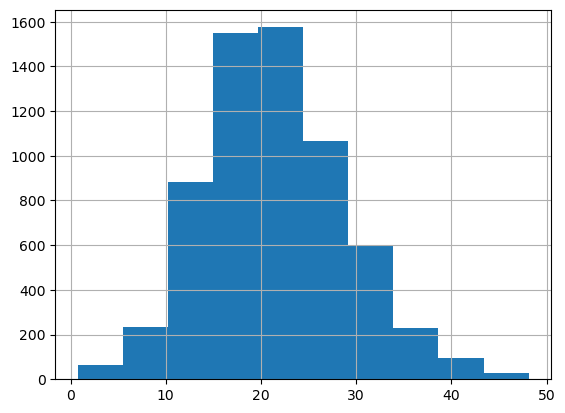

In [28]:
df_40_mod['color2_ratio'].hist()

<Axes: >

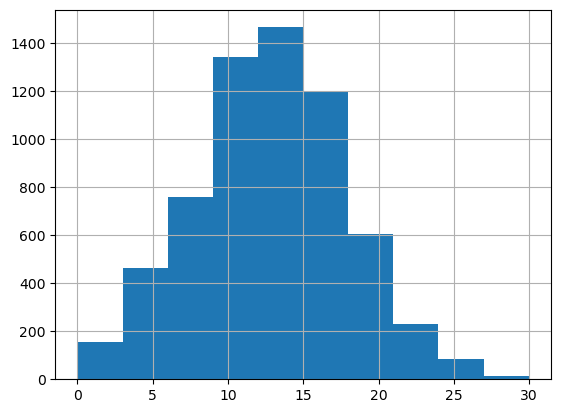

In [30]:
df_40_mod['color3_ratio'].hist()

* ratio_1 : 20~40
* ratio_2 : 15~25
* ratio_3 : 8~17

In [33]:
df_40_mod['color1_ratio'].mean()
# 이미지마다 가장 주된 색상을 평균적으로 전체에서 39% 정도 차지함

39.674878936540594

In [35]:
df_40_mod['color2_ratio'].mean()
# 이미지마다 세컨드 색상을 평균적으로 전체에서 21% 정도 차지함

21.4489001424276

In [37]:
df_40_mod['color3_ratio'].mean()
# 이미지마다 써드 색상을 평균적으로 전체에서 21% 정도 차지함 (1등, 2등의 비율에 따라 3등 비율이 너무 달라져서 그러한 bias 존재함)

12.844926389108755

#### 각 이미지에서 주요 색상 3개를 모두 가져옴

In [40]:
df = pd.concat([
    df_40_mod[['color1', 'color1_ratio']].rename(columns={'color1':'color', 'color1_ratio':'ratio'}),
    df_40_mod[['color2', 'color2_ratio']].rename(columns={'color2':'color', 'color2_ratio':'ratio'}),
    df_40_mod[['color3', 'color3_ratio']].rename(columns={'color3':'color', 'color3_ratio':'ratio'}),
], ignore_index=True)

df

,color,ratio
0,CSS3_Group_17,31.56
1,CSS3_Group_13,17.68
2,CSS3_Group_12,30.28
3,CSS3_Group_32,38.44
4,CSS3_Group_12,33.36
...,...,...
18952,CSS3_Group_0,18.12
18953,CSS3_Group_19,14.24
18954,CSS3_Group_17,10.44
18955,CSS3_Group_0,13.76


In [42]:
df['ratio'].mean()

24.65748140332366

In [44]:
len(df.loc[df['ratio']>=15, :]) / 18957  # 각 이미지에서 주요 색상 ratio가 15% 이상인 것들의 주요 3컬러 모은 것인 모든 색상에서의 비율

0.7134040196233581

In [48]:
df.loc[df['ratio']>=15,'color'].value_counts()  # 각 이미지에서 주요 색상 ratio가 15% 50 이상만

color
CSS3_Group_12    3796
CSS3_Group_17    2588
CSS3_Group_19    2176
CSS3_Group_0     1568
CSS3_Group_13     593
CSS3_Group_21     460
CSS3_Group_8      316
CSS3_Group_2      279
CSS3_Group_25     259
CSS3_Group_9      231
CSS3_Group_32     158
CSS3_Group_24     142
CSS3_Group_39      99
CSS3_Group_4       97
CSS3_Group_20      83
CSS3_Group_5       75
CSS3_Group_34      74
CSS3_Group_1       61
CSS3_Group_38      56
CSS3_Group_15      45
CSS3_Group_10      43
CSS3_Group_23      41
CSS3_Group_28      39
CSS3_Group_11      36
CSS3_Group_29      34
CSS3_Group_26      31
CSS3_Group_18      26
CSS3_Group_35      19
CSS3_Group_30      17
CSS3_Group_33      15
CSS3_Group_16      14
CSS3_Group_36      13
CSS3_Group_27      12
CSS3_Group_6       11
CSS3_Group_31       6
CSS3_Group_14       4
CSS3_Group_3        4
CSS3_Group_7        2
CSS3_Group_37       1
Name: count, dtype: int64

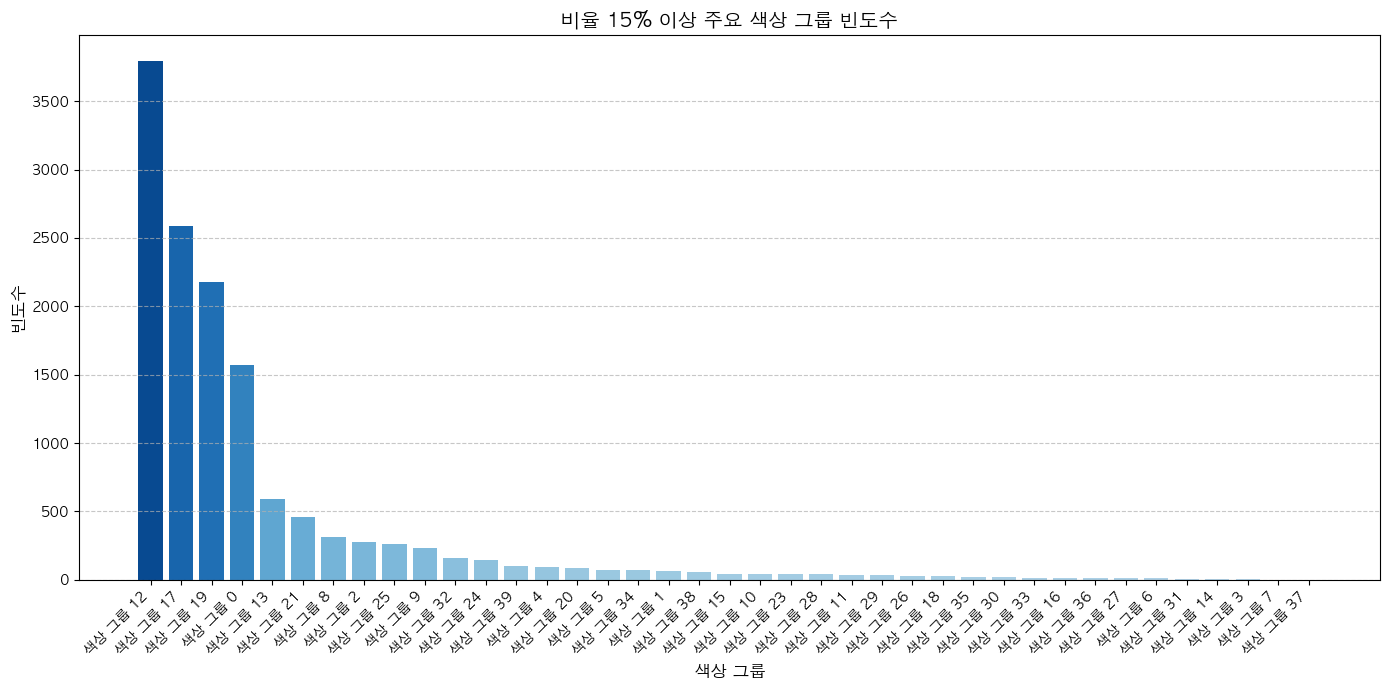

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# 조건에 맞는 색상 count 계산
filtered_counts = df.loc[df['ratio'] >= 15, 'color'].value_counts()

# 인덱스 값을 'CSS3_Group_3' → '색상 그룹 3'으로 변환
korean_labels = [name.replace("CSS3_Group_", "색상 그룹 ") for name in filtered_counts.index]

# 정규화 + 시각 강조용 색상 지정
values = filtered_counts.values
norm_values = (values - values.min()) / (values.max() - values.min() + 1e-5)
enhanced_values = norm_values ** 0.5
adjusted = enhanced_values * 0.6 + 0.3
colors = plt.cm.Blues(adjusted)

# 시각화
plt.figure(figsize=(14, 7))
plt.bar(korean_labels, filtered_counts.values, color=colors)

# 한글 제목과 라벨
plt.title('비율 15% 이상 주요 색상 그룹 빈도수', fontsize=14)
plt.xlabel('색상 그룹', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### 

In [51]:
# (A) Long 포맷 생성
df = pd.concat([
    df_40_mod[['color1', 'color1_ratio']].rename(columns={'color1':'color', 'color1_ratio':'ratio'}),
    df_40_mod[['color2', 'color2_ratio']].rename(columns={'color2':'color', 'color2_ratio':'ratio'}),
    df_40_mod[['color3', 'color3_ratio']].rename(columns={'color3':'color', 'color3_ratio':'ratio'}),
], ignore_index=True)

# (B) 기준에 맞는 색상 추출
filtered     = df[df['ratio'] >= 15]
color_counts = filtered['color'].value_counts()
selected_colors = color_counts[color_counts >= 70].index.tolist()

# (C) 원핫 인코딩할 컬럼 생성
for color in selected_colors:
    df_40_mod[f"color_{color}"] = (
        df_40_mod[['color1','color2','color3']]
        .isin([color])
        .any(axis=1)
        .astype(int)
    )

# (D) result_df 구성
final_cols = ['video_id', 'css3_total_colors'] + [f"color_{c}" for c in selected_colors]
result_df  = df_40_mod[final_cols]

# (E) 순위 매핑용 DataFrame 생성
rank_map_df = pd.DataFrame({
    'rank':  range(1, len(selected_colors) + 1),
    'color': selected_colors
})

# (F) result_df 컬럼명 ‘rank_1’, ‘rank_2’, … 로 변경
rename_dict = {
    f"color_{color}": f"color_rank_{rank}"
    for rank, color in zip(rank_map_df['rank'], rank_map_df['color'])
}
ranked_df = result_df.rename(columns=rename_dict)

# 확인
print(ranked_df.columns.tolist())
print(rank_map_df)



['video_id', 'css3_total_colors', 'color_rank_1', 'color_rank_2', 'color_rank_3', 'color_rank_4', 'color_rank_5', 'color_rank_6', 'color_rank_7', 'color_rank_8', 'color_rank_9', 'color_rank_10', 'color_rank_11', 'color_rank_12', 'color_rank_13', 'color_rank_14', 'color_rank_15', 'color_rank_16', 'color_rank_17']
    rank          color
0      1  CSS3_Group_12
1      2  CSS3_Group_17
2      3  CSS3_Group_19
3      4   CSS3_Group_0
4      5  CSS3_Group_13
5      6  CSS3_Group_21
6      7   CSS3_Group_8
7      8   CSS3_Group_2
8      9  CSS3_Group_25
9     10   CSS3_Group_9
10    11  CSS3_Group_32
11    12  CSS3_Group_24
12    13  CSS3_Group_39
13    14   CSS3_Group_4
14    15  CSS3_Group_20
15    16   CSS3_Group_5
16    17  CSS3_Group_34


In [388]:
rank_map_df

,rank,color
0,1,CSS3_Group_12
1,2,CSS3_Group_17
2,3,CSS3_Group_19
3,4,CSS3_Group_0
4,5,CSS3_Group_13
5,6,CSS3_Group_21
6,7,CSS3_Group_8
7,8,CSS3_Group_2
8,9,CSS3_Group_25
9,10,CSS3_Group_9


In [384]:
ranked_df

,video_id,css3_total_colors,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13,rank_14,rank_15,rank_16,rank_17
0,s6suc9Xz0rM,11,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,kERWAGtltBU,12,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,8VcAaEfuc0s,11,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CI331OcJ8Do,15,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
4,AOrtPpF1t7U,9,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6314,fLNAk4NYOJU,16,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
6315,Sh41rnVFlhU,14,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6316,z1UGEkHIoCY,15,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6317,xVaTzgcJttI,15,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [390]:
ranked_df.to_csv('raw_data/thumbnails/thumbnails_colors.csv', encoding='utf-8', index=False)
rank_map_df.to_csv('raw_data/thumbnails/colorsRank.csv', encoding='utf-8', index=False)

In [ ]:
## 분포 확인!!

<Axes: >

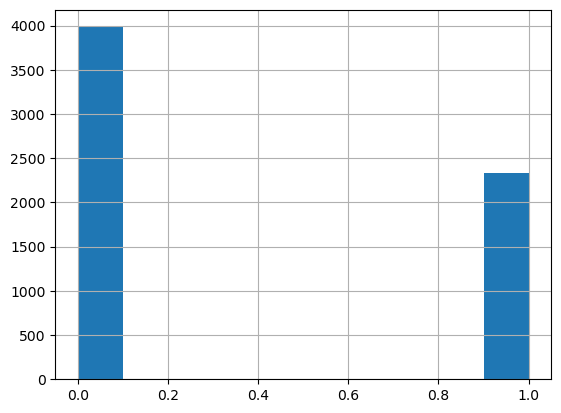

In [378]:
result_df['color_CSS3_Group_0'].hist()

<Axes: >

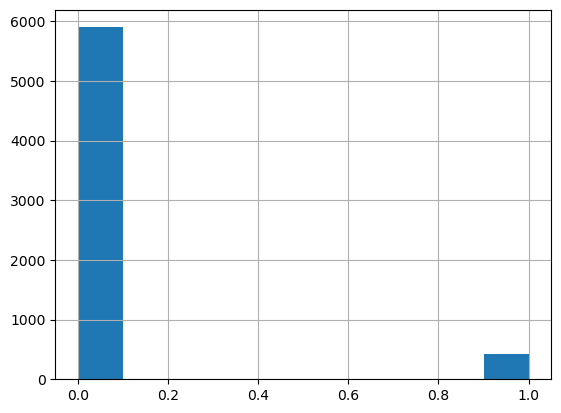

In [380]:
result_df['color_CSS3_Group_2'].hist()

### CSS3 색상 그룹 40개 클러스터링
* 색상 40개 클러스터에 묶인 색상을 볼 때, 잘 묶이지는 않았는데 -> 수동으로 클러스터 변경 진행함
* 대신, 클러스터가 적어서 다양한 색상으로 잡음
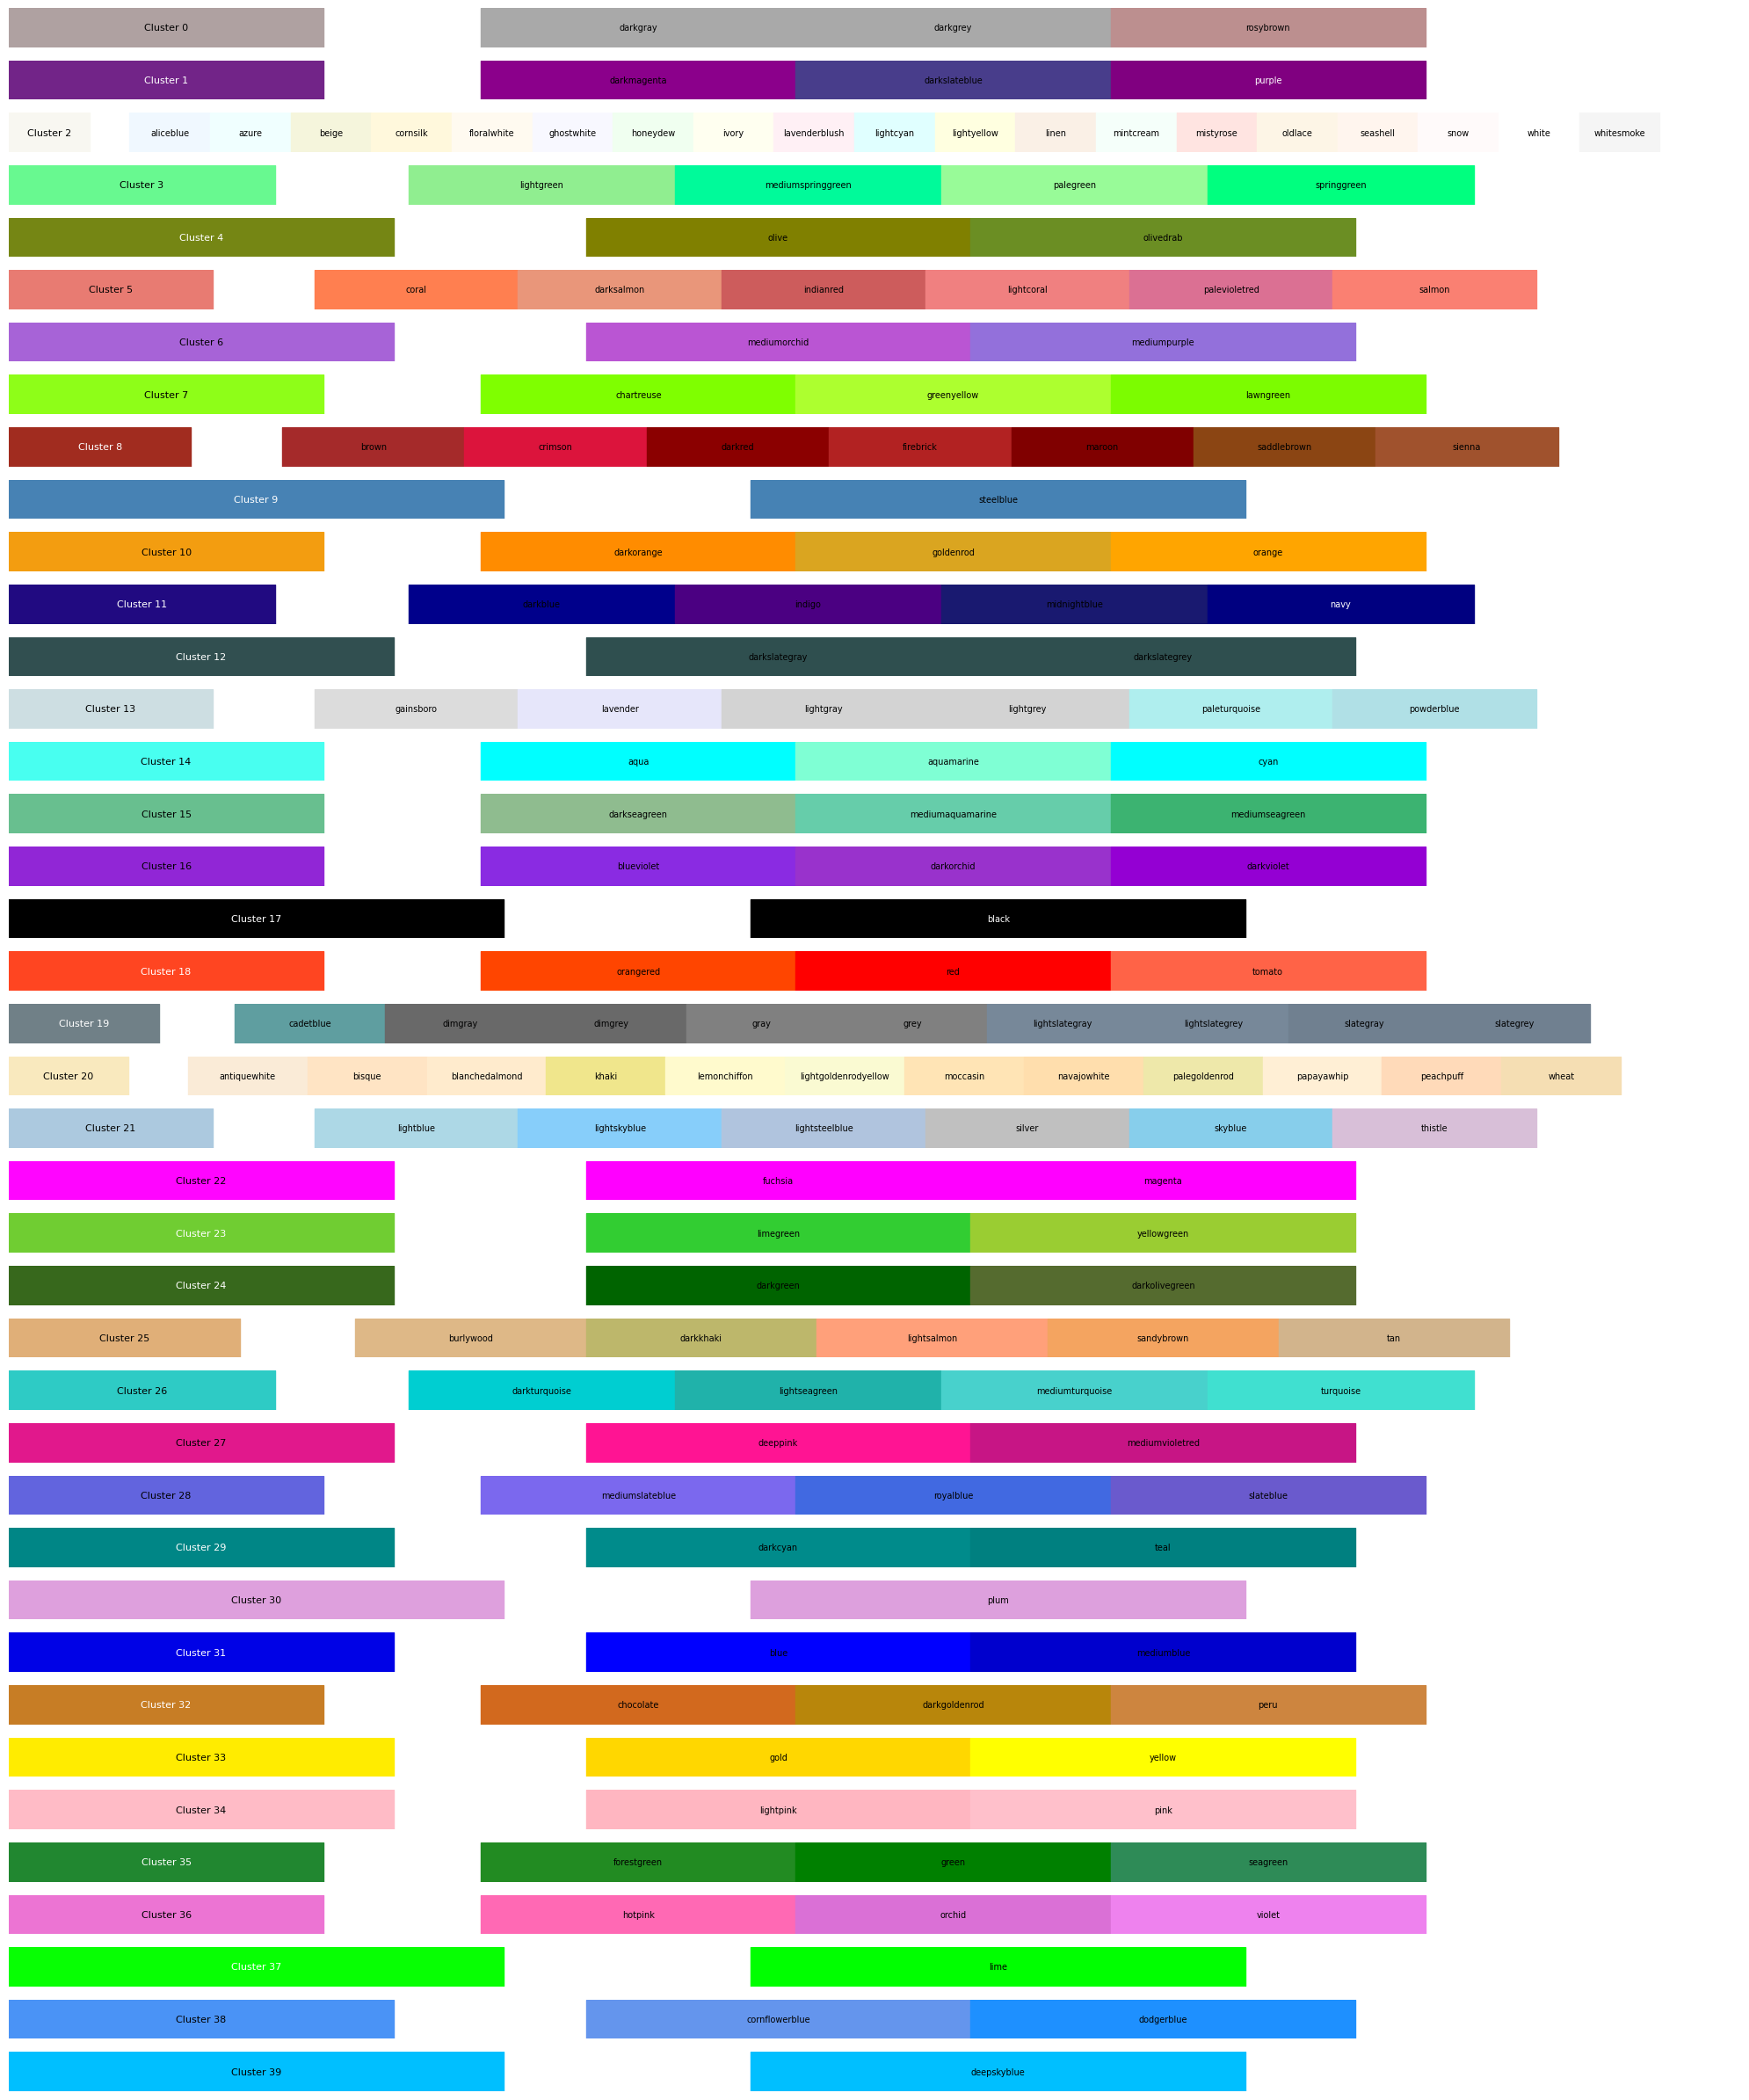

In [204]:
df_40

,video_id,css3_total_colors,color1,color1_ratio,color2,color2_ratio,color3,color3_ratio
0,s6suc9Xz0rM,11,CSS3_Group_17,31.56,CSS3_Group_0,22.36,CSS3_Group_19,9.96
1,kERWAGtltBU,12,CSS3_Group_13,17.68,CSS3_Group_0,17.00,CSS3_Group_12,13.52
2,8VcAaEfuc0s,11,CSS3_Group_12,30.28,CSS3_Group_17,21.00,CSS3_Group_0,20.56
3,CI331OcJ8Do,15,CSS3_Group_32,38.44,CSS3_Group_8,15.56,CSS3_Group_0,9.72
4,AOrtPpF1t7U,9,CSS3_Group_12,33.36,CSS3_Group_17,19.56,CSS3_Group_13,18.68
...,...,...,...,...,...,...,...,...
6314,fLNAk4NYOJU,16,CSS3_Group_13,35.24,CSS3_Group_21,24.36,CSS3_Group_0,18.12
6315,Sh41rnVFlhU,14,CSS3_Group_12,50.20,CSS3_Group_17,19.84,CSS3_Group_19,14.24
6316,z1UGEkHIoCY,15,CSS3_Group_12,70.80,CSS3_Group_19,12.56,CSS3_Group_17,10.44
6317,xVaTzgcJttI,15,CSS3_Group_12,23.44,CSS3_Group_13,22.68,CSS3_Group_0,13.76


In [206]:
df_40['css3_total_colors'].value_counts()

# 색상의 개수를 10개의 초중반 사용하는 이미지가 많음
# 최대 38개를 이용함

css3_total_colors
12    568
13    549
15    535
11    506
14    503
7     461
10    421
9     351
16    347
17    312
8     268
18    230
19    189
6     183
20    137
21    111
22     86
5      85
23     67
25     55
24     54
4      44
28     40
29     33
27     26
30     25
26     25
3      20
32     16
31     16
36     11
37     11
34     10
35      7
38      7
33      6
2       2
40      1
39      1
Name: count, dtype: int64

In [208]:
df_40.loc[df_40['css3_total_colors']==2, :]

,video_id,css3_total_colors,color1,color1_ratio,color2,color2_ratio,color3,color3_ratio
1235,-pIVhc0lc34,2,CSS3_Group_17,70.28,CSS3_Group_12,29.72,NaN,NaN
2075,Onbd9xIrDfk,2,CSS3_Group_12,65.20,CSS3_Group_17,34.80,NaN,NaN


In [210]:
import pandas as pd

# color1, color2, color3 컬럼을 하나로 합쳐서 빈도수 계산
color_counts = pd.concat([
    df_40['color1'],
    df_40['color2'],
    df_40['color3']
]).value_counts()

print(color_counts)

# 진한 청록색(12), 푸른끼 나는 회색, 검은색, 회색빛 나는 라벤더, 회색빛 나는 하늘색, 탁한 하늘색, 자주색, 진한 베이지, 눈 색(약간 탁한 흰색), 진한 하늘색, 약간 연한 갈색 (32)
# 진한 초록색(24)

CSS3_Group_12    4484
CSS3_Group_19    3484
CSS3_Group_17    3048
CSS3_Group_0     2338
CSS3_Group_13     875
CSS3_Group_21     678
CSS3_Group_8      608
CSS3_Group_25     454
CSS3_Group_2      418
CSS3_Group_9      340
CSS3_Group_32     302
CSS3_Group_24     269
CSS3_Group_4      179
CSS3_Group_20     150
CSS3_Group_39     143
CSS3_Group_5      129
CSS3_Group_34     125
CSS3_Group_1      104
CSS3_Group_15      87
CSS3_Group_38      79
CSS3_Group_11      71
CSS3_Group_29      69
CSS3_Group_28      67
CSS3_Group_10      63
CSS3_Group_23      62
CSS3_Group_26      49
CSS3_Group_18      48
CSS3_Group_35      41
CSS3_Group_30      37
CSS3_Group_33      31
CSS3_Group_27      29
CSS3_Group_16      23
CSS3_Group_6       17
CSS3_Group_36      17
CSS3_Group_31      13
CSS3_Group_3       10
CSS3_Group_37       5
CSS3_Group_14       4
CSS3_Group_7        4
CSS3_Group_22       1
Name: count, dtype: int64


In [212]:
len(color_counts)

# 총 40개로 클러스터 나뉘어짐

40

### CSS3 색상 그룹 40개 클러스터링 (+ 직접 클러스터 변경)


In [71]:
### 상위 색상 그룹에서 같은 색상이 많으면 합치기
### 너무 안 나뉘져 있으면 분리하기
### color 3개 concat했을 때 count가 적으면 기타색상으로 묶기

# 인코딩 방식
# 1) 전체 count 높은 10개 색상에 대해 라벨인코딩 + 기타 (color 1만 하게 될 거 같은 느낌..?)
# 2) 각 이미지에서 색깔 탑 3에서 10% 넘는 것들을 리스트로 가져와서 원핫인코딩 (value는 1/0 or ratio 값)
#    ratio 값 분포 작으면 지수함수 등으로 뻥튀기하고, 정규화

### CSS3 색상 그룹 50개 클러스터링
* 색상은 꽤 잘 묶인 것 같음
* 회색 계열을 굉장히 많이 잡음 -> 클러스터 변경 필요
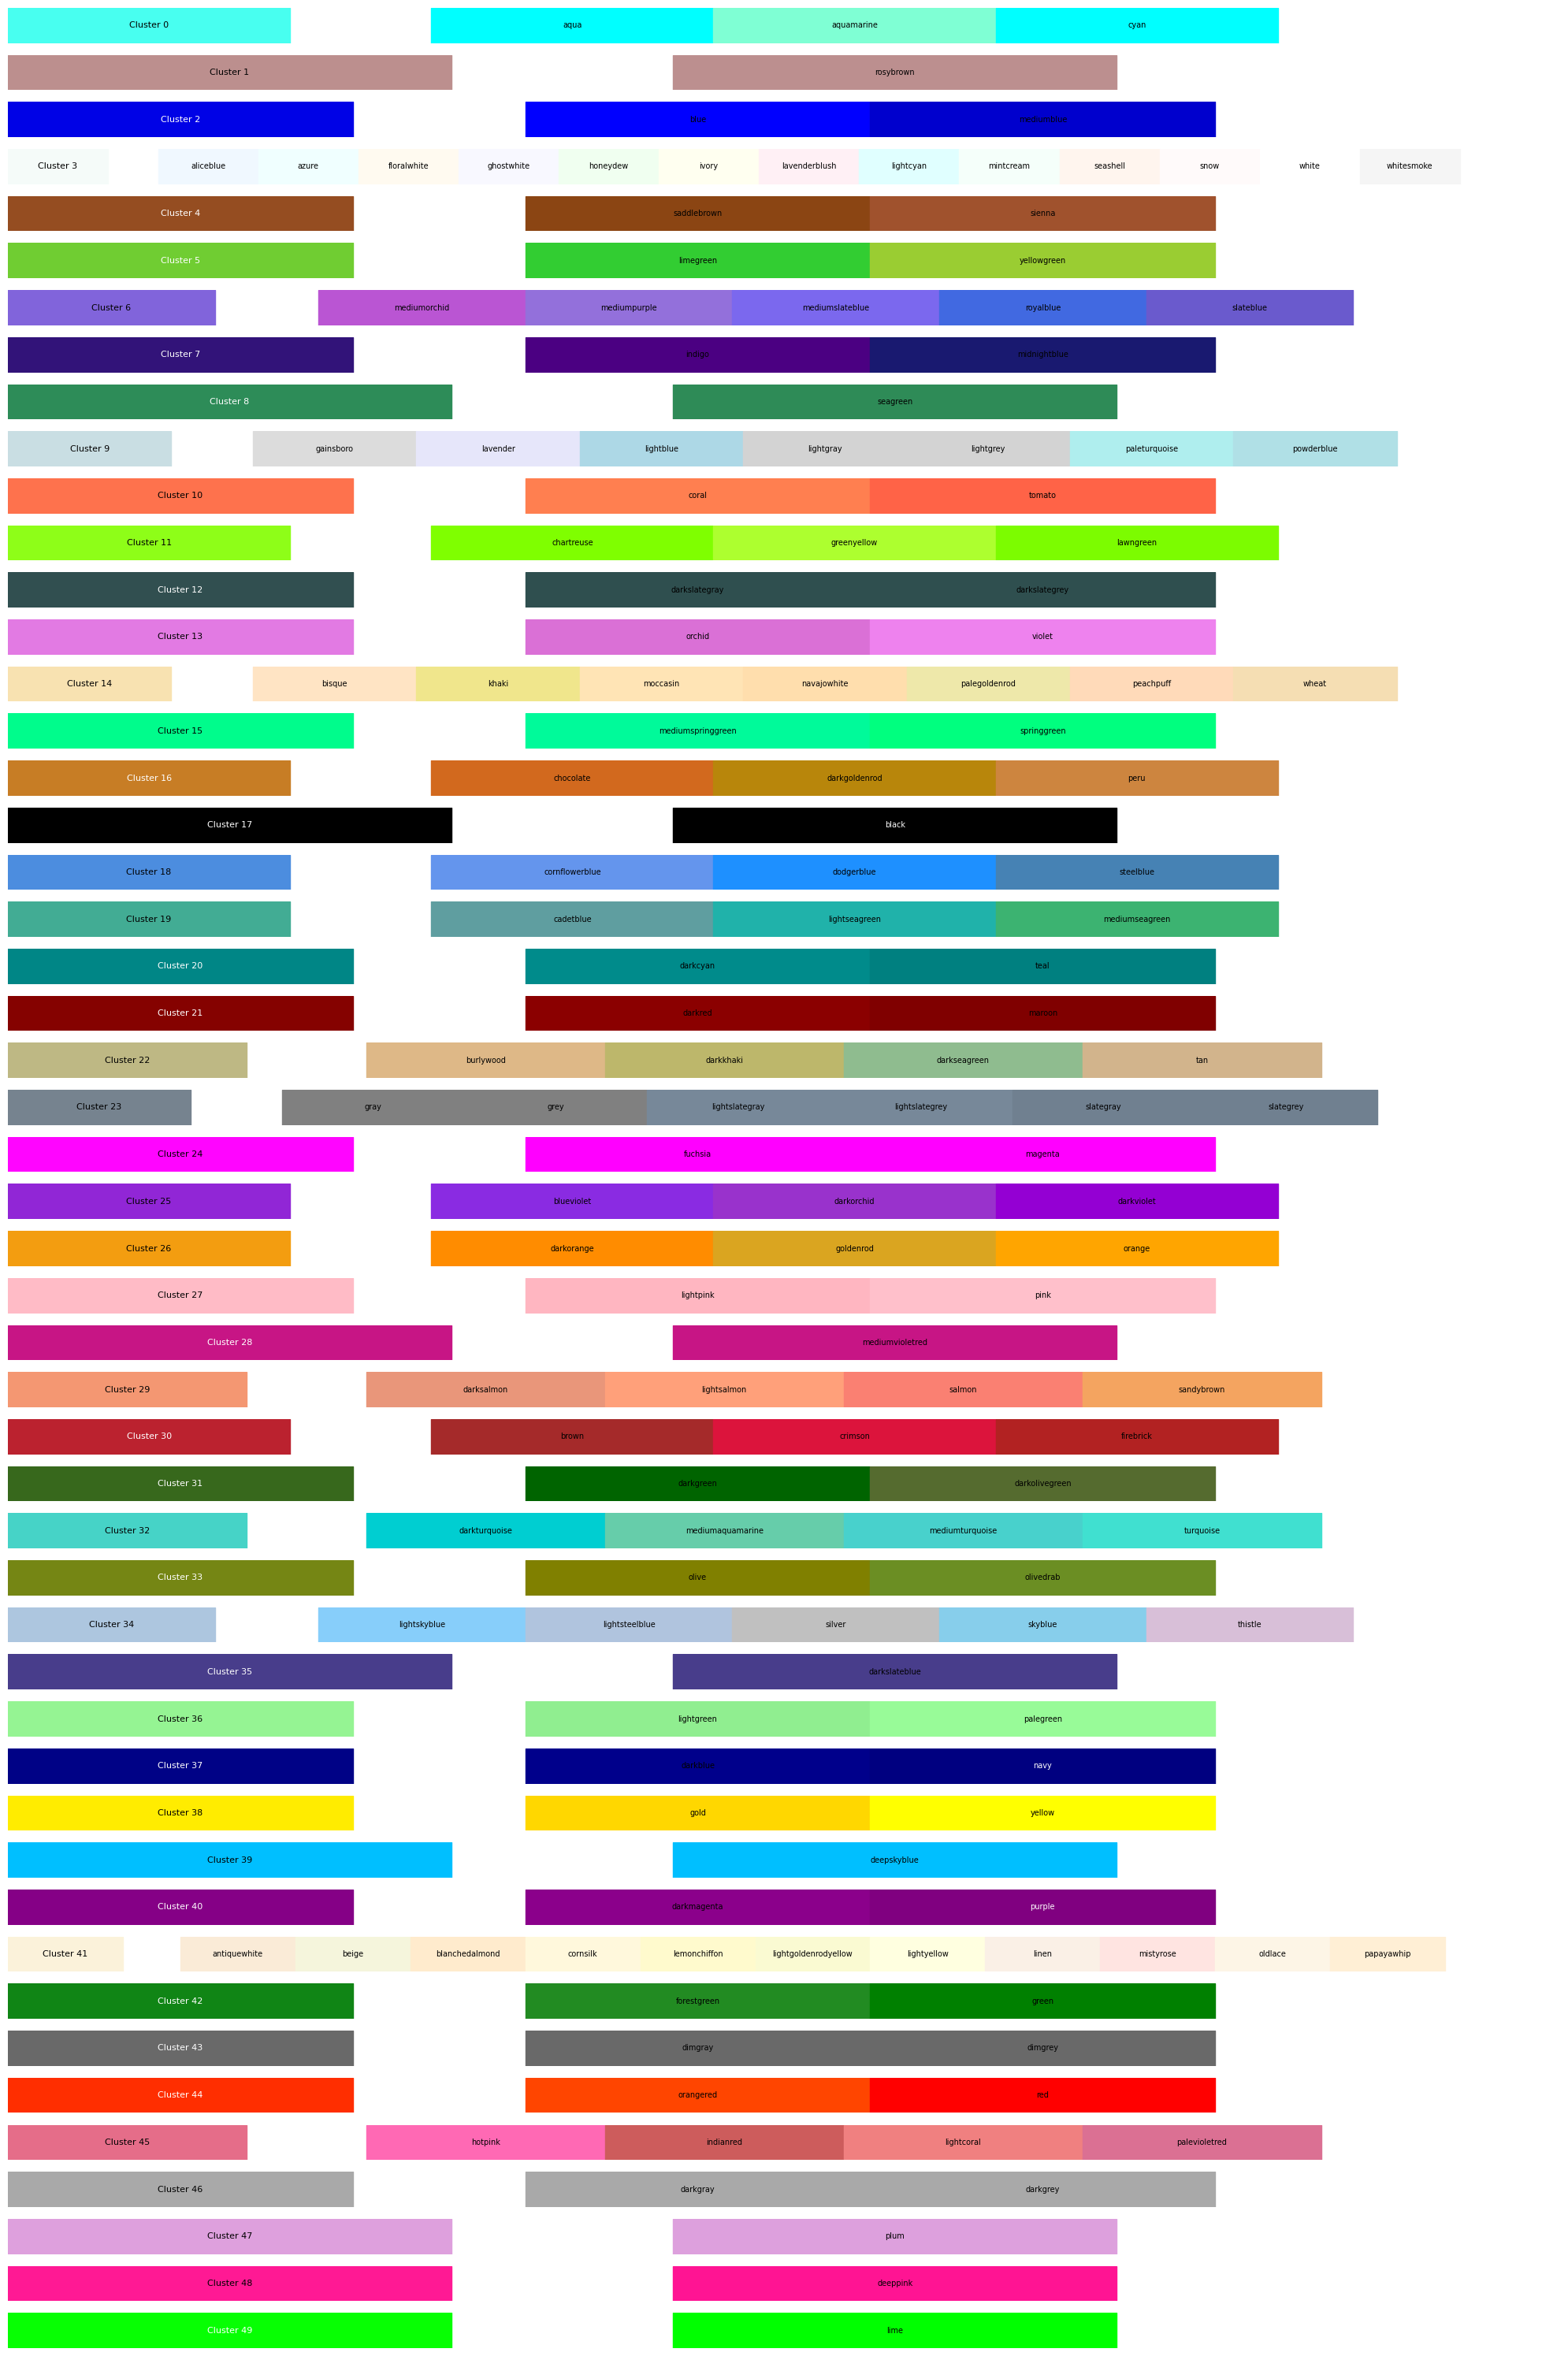

In [40]:
df_50

,video_name,css3_total_colors,color1,color1_ratio,color2,color2_ratio,color3,color3_ratio
0,6_C6XPLef9A_,23,CSS3_Group_12,25.28,CSS3_Group_1,16.92,CSS3_Group_43,13.68
1,41mzHCPBPHI_,15,CSS3_Group_17,44.84,CSS3_Group_22,12.52,CSS3_Group_12,11.84
2,2bjmmmrbBdY_,17,CSS3_Group_9,24.08,CSS3_Group_46,12.60,CSS3_Group_12,11.64
3,j1iWcKxqbfM_,15,CSS3_Group_12,37.72,CSS3_Group_43,25.76,CSS3_Group_23,12.40
4,rels-WBsNLI_,8,CSS3_Group_43,22.92,CSS3_Group_46,22.44,CSS3_Group_23,20.76
...,...,...,...,...,...,...,...,...
6406,HMeWhhC_BbM_,9,CSS3_Group_17,57.88,CSS3_Group_12,26.76,CSS3_Group_43,7.72
6407,P7ElAQhXrb8_,17,CSS3_Group_1,31.84,CSS3_Group_23,12.64,CSS3_Group_46,11.88
6408,x_d0ufkV6eY_,19,CSS3_Group_3,49.64,CSS3_Group_41,13.76,CSS3_Group_9,10.16
6409,tDR004y68VA_,7,CSS3_Group_43,25.52,CSS3_Group_12,19.96,CSS3_Group_46,15.60


In [62]:
import pandas as pd

# color1, color2, color3 컬럼을 하나로 합쳐서 빈도수 계산
color_counts = pd.concat([
    df_50['color1'],
    df_50['color2'],
    df_50['color3']
]).value_counts()

print(color_counts)

# 진한 청록색, 검은색, 회색 계열들...
# -> 회색 계열이 굉장히 많이 잡힘

CSS3_Group_12    3995
CSS3_Group_17    3140
CSS3_Group_43    2842
CSS3_Group_46    1493
CSS3_Group_23    1206
CSS3_Group_9      967
CSS3_Group_1      708
CSS3_Group_4      678
CSS3_Group_34     550
CSS3_Group_22     547
CSS3_Group_3      360
CSS3_Group_18     227
CSS3_Group_35     224
CSS3_Group_31     207
CSS3_Group_16     195
CSS3_Group_21     191
CSS3_Group_14     153
CSS3_Group_33     150
CSS3_Group_27     144
CSS3_Group_41     140
CSS3_Group_39     126
CSS3_Group_7       81
CSS3_Group_30      76
CSS3_Group_26      74
CSS3_Group_19      73
CSS3_Group_45      71
CSS3_Group_6       64
CSS3_Group_5       63
CSS3_Group_29      61
CSS3_Group_20      57
CSS3_Group_8       50
CSS3_Group_38      41
CSS3_Group_32      41
CSS3_Group_47      35
CSS3_Group_44      32
CSS3_Group_10      28
CSS3_Group_25      26
CSS3_Group_42      23
CSS3_Group_28      19
CSS3_Group_2       15
CSS3_Group_13      14
CSS3_Group_36      13
CSS3_Group_40       8
CSS3_Group_49       6
CSS3_Group_48       5
CSS3_Group

In [44]:
len(color_counts)

# 총 40개로 클러스터 나뉘어짐

50

In [52]:
color_counts.sum()

19231

In [64]:
3995/19231  # 청록색 (많은 이미지에서 탑 3 색상으로 사용하고 있음)

0.2077375071499142